# Exploração dos Dados

## Carregando o dataset

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [34]:
# Pacotes importantes para este projeto
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline 

In [35]:
dfMovies = pd.read_csv("./ml-latest-small/movies.csv")
dfRatings = pd.read_csv("./ml-latest-small/ratings.csv")
dfTags = pd.read_csv("./ml-latest-small/tags.csv")
dfLinks = pd.read_csv("./ml-latest-small/links.csv")

# print("Movies:")
# print(dfMovies.head())
# print("Ratings:")
# print(dfRatings.head())
# print("Tags:")
# print(dfTags.head())
# print("Links:")
# print(dfLinks.head())

# Faz o merge do dataset utilizando os id's dos filmes como chave
dfMoviesRatings = pd.merge(dfMovies, dfRatings, on=['movieId'])

## Pré-processando os dados

In [36]:
# Separando os filmes e os títulos
moviesTitles = dfMoviesRatings[['movieId', 'title']]
moviesTitles = moviesTitles.set_index('movieId')
moviesTitles = moviesTitles.drop_duplicates()
moviesTitles.head()

# Remove colunas que não serão utilizadas no treinamento do sistema de recomendação
dfMoviesRatings = dfMoviesRatings.drop(['timestamp', 'userId', 'title'], 1)
print(dfMoviesRatings.head())

   movieId                                       genres  rating
0        1  Adventure|Animation|Children|Comedy|Fantasy     3.0
1        1  Adventure|Animation|Children|Comedy|Fantasy     4.0
2        1  Adventure|Animation|Children|Comedy|Fantasy     5.0
3        1  Adventure|Animation|Children|Comedy|Fantasy     2.0
4        1  Adventure|Animation|Children|Comedy|Fantasy     3.0


### Dados nulos ou faltantes

In [37]:
print("Movies - Null values: {}".format(dfMovies.isnull().any().any()))
print("Ratings - Null values: {}".format(dfRatings.isnull().any().any()))
print("Tags - Null values: {}".format(dfTags.isnull().any().any()))
print("Links - Null values: {}".format(dfLinks.isnull().any().any()))

Movies - Null values: False
Ratings - Null values: False
Tags - Null values: False
Links - Null values: True


### Análise e processamento das categorias

    Nesta etapa estou verificando quais as categorias que são encontradas no dataset:
    - categorias repetidas;
    - itens que não correspondem às categorias;

In [38]:
# Encontra todas as categorias presentes no dataset
dfCategories = dfMoviesRatings.genres.str.split(pat="|", expand=True)
dfCategories = Series(dfCategories.values.ravel()).unique()
dfCategories

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', None,
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'Documentary', 'IMAX', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [39]:
# Insere as colunas de cada categoria  
for col in dfCategories:
    dfMoviesRatings.insert(loc= len(dfMoviesRatings.columns), column=col, value=0)
dfMoviesRatings.head()

,movieId,genres,rating,Adventure,Animation,Children,Comedy,Fantasy,None,Romance,...,Horror,Mystery,Sci-Fi,Documentary,IMAX,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Adventure|Animation|Children|Comedy|Fantasy,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Adventure|Animation|Children|Comedy|Fantasy,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Adventure|Animation|Children|Comedy|Fantasy,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Adventure|Animation|Children|Comedy|Fantasy,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Adventure|Animation|Children|Comedy|Fantasy,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Transforma cada categoria em uma feature
count = 0
for i, row in dfMoviesRatings.iterrows():
    dfMoviesRatings.set_value(col=row[1].split(sep="|"), index=i, value=1)

dfMoviesRatings.head()

,movieId,genres,rating,Adventure,Animation,Children,Comedy,Fantasy,None,Romance,...,Horror,Mystery,Sci-Fi,Documentary,IMAX,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Adventure|Animation|Children|Comedy|Fantasy,3.0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Adventure|Animation|Children|Comedy|Fantasy,4.0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Adventure|Animation|Children|Comedy|Fantasy,5.0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Adventure|Animation|Children|Comedy|Fantasy,2.0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Adventure|Animation|Children|Comedy|Fantasy,3.0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Nesta célula estou removendo as colunas "None" e "(no genres listed)" que não correspondem às categorias de filmes. 

In [41]:
# Remove as categorias: None, '(no genres listed)'
dfMoviesRatings = dfMoviesRatings.drop([None, '(no genres listed)','genres'], 1)

### Tags

    - Avaliar os tags mais comuns;
    - Existe relação das tags com as avaliações? Palavras positivas e negativas?

### Análise e processamento dos nomes dos filmes

    - Avaliar se existem nomes de um mesmo filme com escritas diferentes;
    - 

### Análise e processamentos dos ratings

    - Normalizar os valores;
    - Verificar a existência de outliers;

#### Verificar se o número de ratings é uniforme entre os filmes

TODO: Detalhar observações

Algumas estatísticas:


count    9066.000000
mean       11.030664
std        24.050800
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       341.000000
dtype: float64

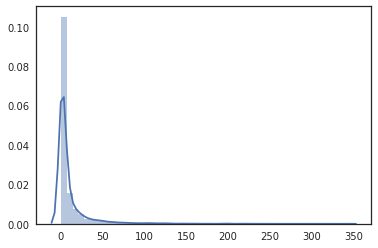

In [42]:
# Verifica o número de avaliações por filme
number_of_ratings_per_movie = pd.value_counts(dfMoviesRatings['movieId'].values, sort=False)

# Apresenta o gráfico com a distribuição o número de avaliações por filme
sns.distplot(pd.Series(number_of_ratings_per_movie, name=""))

# Algumas estatísticas
print('Algumas estatísticas:')
number_of_ratings_per_movie.describe()

Algumas estatísticas:


count    8150.000000
mean        4.885890
std         5.798493
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        27.000000
Name: 0, dtype: float64

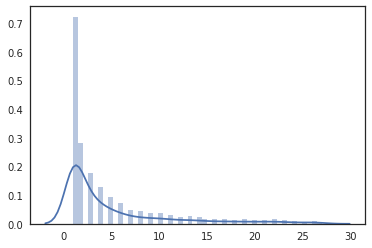

In [43]:
# Retirando 10% dos filmes que apresentam muitos mais ratings que os demais 90%
new_data = number_of_ratings_per_movie.to_frame()[number_of_ratings_per_movie < 
                                                  number_of_ratings_per_movie.quantile(0.9)]

sns.distplot(pd.Series(new_data[0], name=""))

# Algumas estatísticas
print('Algumas estatísticas:')
new_data[0].describe()

## Conclusões

### Existe alguma relação entre a categoria do filme e a forma que ele é avaliado?

### Quais são as categorias que possuem relação entre si?
Para verificar a relação entre as categorias é calculado a matriz de correlação, como apresentado na linha 4 da célula a seguir.
    
Existe uma grande correlação entre algumas categorias, como podemos observar na matriz de correlação apresentada abaixo. Podemos citar como exemplo o fato dos filmes de animação estarem relacionados a filmes infantis (correlação de 0.65). Esta correlação faz sentido visto que a grande maioria dos filmes de animação são direcionados ao público infantil. 
    
A mesma análise pode ser feita para categorias pouco correlacionadas. Neste contexto, podemos citar os filmes de comédia que têm correlação baixa com filmes de suspense. Da mesma que filmes de suspense estão pouco relacionados com musicais e animações.

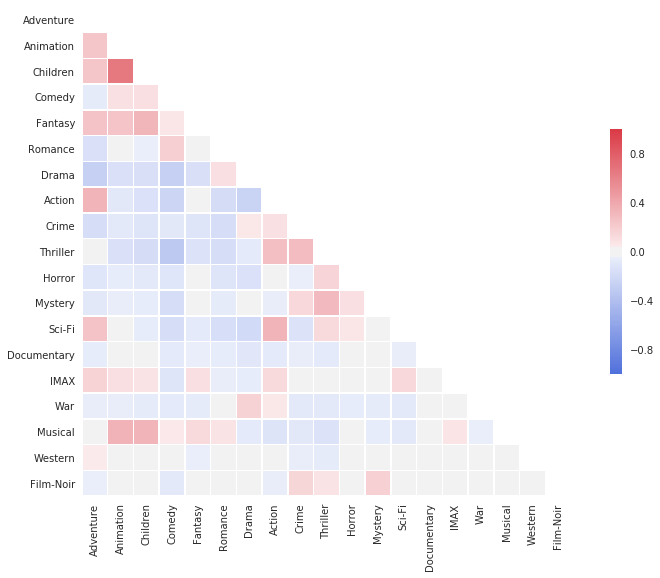

In [44]:
sns.set(style="white")

# Calcula a matriz de correlação das categorias
corr = dfMoviesRatings.drop(['movieId', 'rating'],1).corr()

# Gera uma máscara para a parte superior do triângulo
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Define a area de render do gráfico
f, ax = plt.subplots(figsize=(14, 9))

# Gera o colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Deseja o mapa de calor com a correlação entre as categorias
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., vmin=-1.,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

A seguir são apresentadas as maiores e menores correlações entre ass categorias dos filmes com os respectivos valores.

In [45]:
# Filmes com maior correlação
print("Filmes com correlação mais ALTA")
dfMax = corr[ corr[:] == np.max(corr[corr[:] != 1]) ]
for row in corr:
    # Categoria corrente
    currentCategoryName = corr.columns[corr.columns == row][0]
    # Categoria com a maior correlação 
    correlatedCategory = dfMax[row].dropna().index[0]
    # Correlação
    correlation = dfMax[row].dropna()[0]
    # Imprimi as maiores correlações entre as categorias
    print("{}: \t\t{} com valor de {}".format(currentCategoryName, correlatedCategory, 
                                                                                 str(correlation)))
# Filmes com menor correlação
print("\n\nFilmes com correlação mais BAIXA")
dfMin = corr[ corr[:] == np.min(corr[corr[:] != 1]) ]
for row in corr:
    # Categoria corrente
    currentCategoryName = corr.columns[corr.columns == row][0]
    # Categoria com a maior correlação 
    correlatedCategory = dfMin[row].dropna().index[0]
    # Correlação
    correlation = dfMin[row].dropna()[0]
    # Imprimi as maiores correlações entre as categorias
    print("{}: \t\t{} com valor de {}".format(currentCategoryName, correlatedCategory, 
                                                                                 str(correlation)))    

Filmes com correlação mais ALTA
Adventure: 		Action com valor de 0.334107578999
Animation: 		Children com valor de 0.657121010397
Children: 		Animation com valor de 0.657121010397
Comedy: 		Romance com valor de 0.190878209301
Fantasy: 		Children com valor de 0.327139575531
Romance: 		Comedy com valor de 0.190878209301
Drama: 		War com valor de 0.177697191918
Action: 		Adventure com valor de 0.334107578999
Crime: 		Thriller com valor de 0.294396283898
Thriller: 		Mystery com valor de 0.30398299322
Horror: 		Thriller com valor de 0.162357107526
Mystery: 		Thriller com valor de 0.30398299322
Sci-Fi: 		Action com valor de 0.330454940338
Documentary: 		Musical com valor de 0.00157719110031
IMAX: 		Adventure com valor de 0.16677919481
War: 		Drama com valor de 0.177697191918
Musical: 		Animation com valor de 0.340284459621
Western: 		Adventure com valor de 0.0454750665899
Film-Noir: 		Mystery com valor de 0.181040734533


Filmes com correlação mais BAIXA
Adventure: 		Drama com valor de -0.26

# Sistema de Recomendação

Idéias:
- Redução de dimensionalidade: utilizar auto-encoder ou PCA para reduzir número de features
- Clusterização para recomendações